In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datasets
import json
import os

In [3]:
train_language_types = ["en"]
train_language_types += ["de", "fr", "it", "vi", "ar", "ro", "sk", "ca", "hr", "bn", "ne", "mr", "kn"]
ood_language_types = ["ru", "zh", "es", "nl", "id", "hu", "da", "uk", "sr", "hi", "ta", "ml", "te"]
language_types = train_language_types + ood_language_types

def map_letters_to_numbers(letter):
    if letter == "2":
        return 1
    if letter == "1":
        return 0
    if letter == "3":
        return 2
    if letter == "4":
        return 3
    return ord(letter) - ord("A")

accuracies_base = []
likelihoods_base = []
likelihoods_gt_base = []
for language in language_types:
    answers = np.load(os.path.join("base_model_arc_0shot", f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join("base_model_arc_0shot", f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_base.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_base.append(A_to_D_logits_all.sum(-1).mean())
    likelihoods_gt_base.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_base = np.array(accuracies_base)
likelihoods_base = np.array(likelihoods_base)
likelihoods_gt_base = np.array(likelihoods_gt_base)

accuracies_multilingual = []
likelihoods_multilingual = []
likelihoods_gt_multilingual = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_multilingual_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_multilingual.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_multilingual.append(A_to_D_logits_all.sum(-1).mean())
    likelihoods_gt_multilingual.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_multilingual = np.array(accuracies_multilingual)
likelihoods_multilingual = np.array(likelihoods_multilingual)
likelihoods_gt_multilingual = np.array(likelihoods_gt_multilingual)

accuracies_multilingual_easy = []
likelihoods_multilingual_easy = []
likelihoods_gt_multilingual_easy = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_multilingual_easy_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_multilingual_easy.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_multilingual_easy.append(A_to_D_logits_all.sum(-1).mean())
    likelihoods_gt_multilingual_easy.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_multilingual_easy = np.array(accuracies_multilingual_easy)
likelihoods_multilingual_easy = np.array(likelihoods_multilingual_easy)
likelihoods_gt_multilingual_easy = np.array(likelihoods_gt_multilingual_easy)


accuracies_english = []
likelihoods_english = []
likelihoods_gt_english = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_english_llama7B_2/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_english.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_english.append((A_to_D_logits_all.sum(-1)).mean())
    likelihoods_gt_english.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())
    
accuracies_english = np.array(accuracies_english)
likelihoods_english = np.array(likelihoods_english)
likelihoods_gt_english = np.array(likelihoods_gt_english)


accuracies_english_kannada = []
likelihoods_english_kannada = []
likelihoods_gt_english_kannada = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_english_kannada_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_english_kannada.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_english_kannada.append((A_to_D_logits_all.sum(-1)).mean())
    likelihoods_gt_english_kannada.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_english_kannada = np.array(accuracies_english_kannada)
likelihoods_english_kannada = np.array(likelihoods_english_kannada)
likelihoods_gt_english_kannada = np.array(likelihoods_gt_english_kannada)


accuracies_english_hardest4 = []
likelihoods_english_hardest4 = []
likelihoods_gt_english_hardest4 = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_english_hardest4_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_english_hardest4.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_english_hardest4.append((A_to_D_logits_all.sum(-1)).mean())
    likelihoods_gt_english_hardest4.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_english_hardest4 = np.array(accuracies_english_hardest4)
likelihoods_english_hardest4 = np.array(likelihoods_english_hardest4)
likelihoods_gt_english_hardest4 = np.array(likelihoods_gt_english_hardest4)



accuracies_german = []
likelihoods_german = []
likelihoods_gt_german = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_german_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_german.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_german.append((A_to_D_logits_all.sum(-1)).mean())
    likelihoods_gt_german.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_german = np.array(accuracies_german)
likelihoods_german = np.array(likelihoods_german)
likelihoods_gt_german = np.array(likelihoods_gt_german)


accuracies_croatian = []
likelihoods_croatian = []
likelihoods_gt_croatian = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_croatian_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_croatian.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_croatian.append((A_to_D_logits_all.sum(-1)).mean())
    likelihoods_gt_croatian.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_croatian = np.array(accuracies_croatian)
likelihoods_croatian = np.array(likelihoods_croatian)
likelihoods_gt_croatian = np.array(likelihoods_gt_croatian)



accuracies_kannada = []
likelihoods_kannada = []
likelihoods_gt_kannada = []
model_path = "/data/katie_kang/trlx/examples/ckpts/sft_arc_kannada_llama7B/checkpoint_20000/hf_model"

for language in language_types:
    answers = np.load(os.path.join(model_path, f"{language}_answers.npy"))
    A_to_D_logits_all = np.load(os.path.join(model_path, f"{language}_A_to_D_probs_unnorm.npy"))
    accuracies_kannada.append((A_to_D_logits_all.argmax(-1) == list(map(map_letters_to_numbers, answers))).sum()/len(answers))
    likelihoods_kannada.append((A_to_D_logits_all.sum(-1)).mean())
    likelihoods_gt_kannada.append(A_to_D_logits_all[np.arange(len(A_to_D_logits_all)), np.array(list(map(map_letters_to_numbers, answers)))].mean())

accuracies_kannada = np.array(accuracies_kannada)
likelihoods_kannada = np.array(likelihoods_kannada)
likelihoods_gt_kannada = np.array(likelihoods_gt_kannada)

In [11]:
print(np.mean(accuracies_english))
print(np.mean(accuracies_english_kannada))
print(np.mean(accuracies_english_hardest4))

0.32166522270671377
0.3252893716268573
0.33526553447596674


In [13]:
print(np.mean(accuracies_multilingual[9]))
print(np.mean(accuracies_multilingual_easy[9]))
print(np.mean(accuracies_croatian[9]))
print(np.mean(accuracies_english[9]))



0.43798118049615054
0.41916167664670656
0.31479897348160824
0.3421727972626176


Text(0.5, 0, '0-shot accuracy')

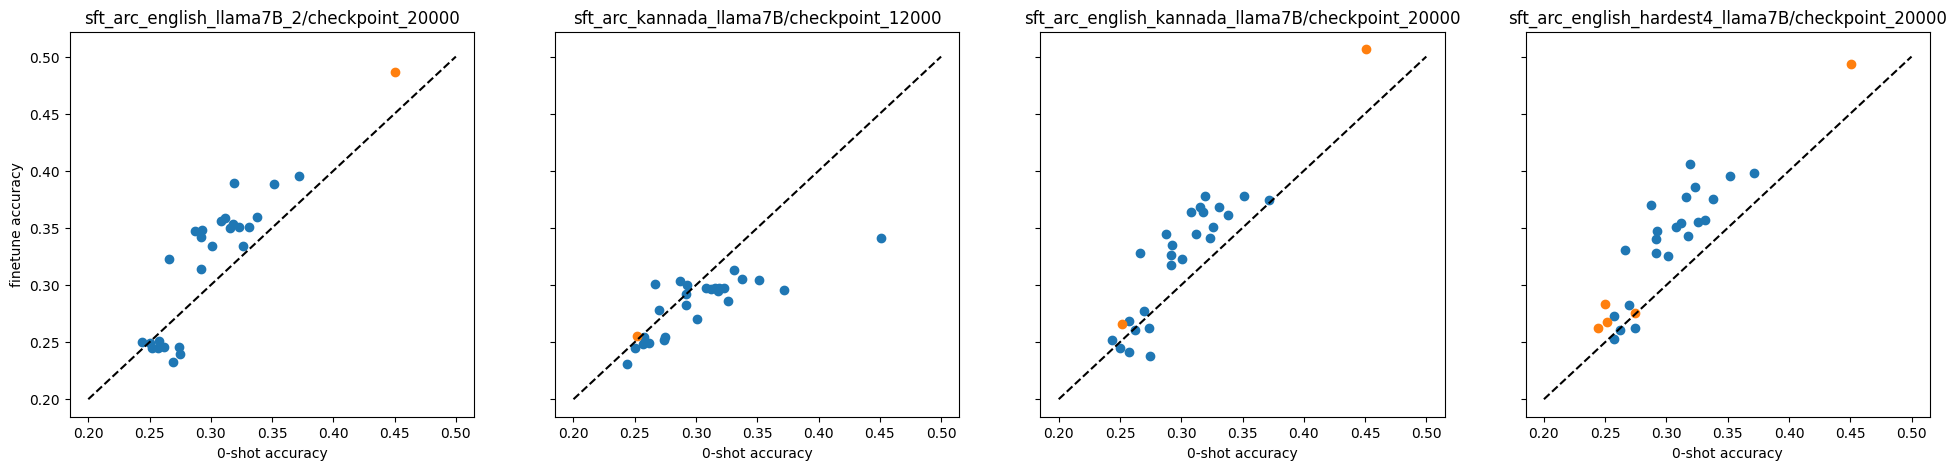

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(24, 5), sharex=True, sharey=True)

axs[0].scatter(accuracies_base[1:], accuracies_english[1:], label="test lanuguages")
axs[0].scatter(accuracies_base[:1], accuracies_english[:1], label="train lanuguages")

axs[0].set_title("sft_arc_english_llama7B_2/checkpoint_20000")
axs[0].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
axs[0].set_ylabel("finetune accuracy")
axs[0].set_xlabel("0-shot accuracy")

test_idxs = np.concatenate([np.arange(0,  13), np.arange(14,  len(accuracies_base))])
axs[1].scatter(accuracies_base[test_idxs], accuracies_kannada[test_idxs], label="test lanuguages")
axs[1].scatter(accuracies_base[13], accuracies_kannada[13], label="train lanuguages")

axs[1].set_title("sft_arc_kannada_llama7B/checkpoint_12000")
axs[1].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
axs[1].set_xlabel("0-shot accuracy")



test_idxs = np.concatenate([np.arange(1,  13), np.arange(14,  len(accuracies_base))])
train_idxs = [0, 13]
axs[2].scatter(accuracies_base[test_idxs], accuracies_english_kannada[test_idxs], label="test lanuguages")
axs[2].scatter(accuracies_base[train_idxs], accuracies_english_kannada[train_idxs], label="train lanuguages")
axs[2].set_title("sft_arc_english_kannada_llama7B/checkpoint_20000")
axs[2].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
axs[2].set_xlabel("0-shot accuracy")


test_idxs = np.concatenate([np.arange(1,  10), np.arange(14,  len(accuracies_base))])
train_idxs = [0, 10, 11, 12, 13]
axs[3].scatter(accuracies_base[test_idxs], accuracies_english_hardest4[test_idxs], label="test lanuguages")
axs[3].scatter(accuracies_base[train_idxs], accuracies_english_hardest4[train_idxs], label="train lanuguages")
axs[3].set_title("sft_arc_english_hardest4_llama7B/checkpoint_20000")
axs[3].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--") 
axs[3].set_xlabel("0-shot accuracy")


In [7]:
accuracies_english_hardest4[13]

0.26742160278745647

In [8]:
accuracies_kannada[13]

0.25522648083623695

Text(0, 0.5, 'finetune accuracy')

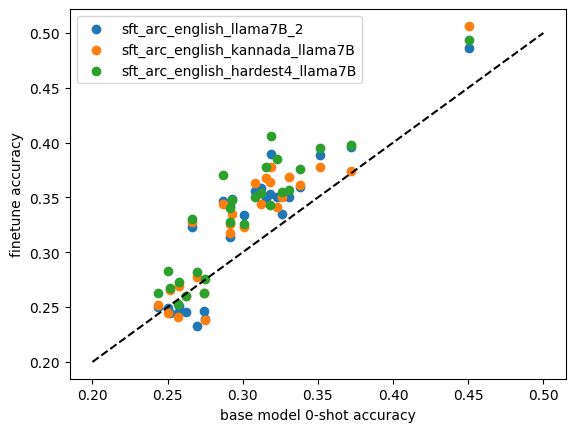

In [7]:
plt.scatter(accuracies_base, accuracies_english, label="sft_arc_english_llama7B_2")
plt.scatter(accuracies_base, accuracies_english_kannada, label="sft_arc_english_kannada_llama7B")
plt.scatter(accuracies_base, accuracies_english_hardest4, label="sft_arc_english_hardest4_llama7B")
plt.plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")

plt.legend()

plt.xlabel("base model 0-shot accuracy")
plt.ylabel("finetune accuracy")


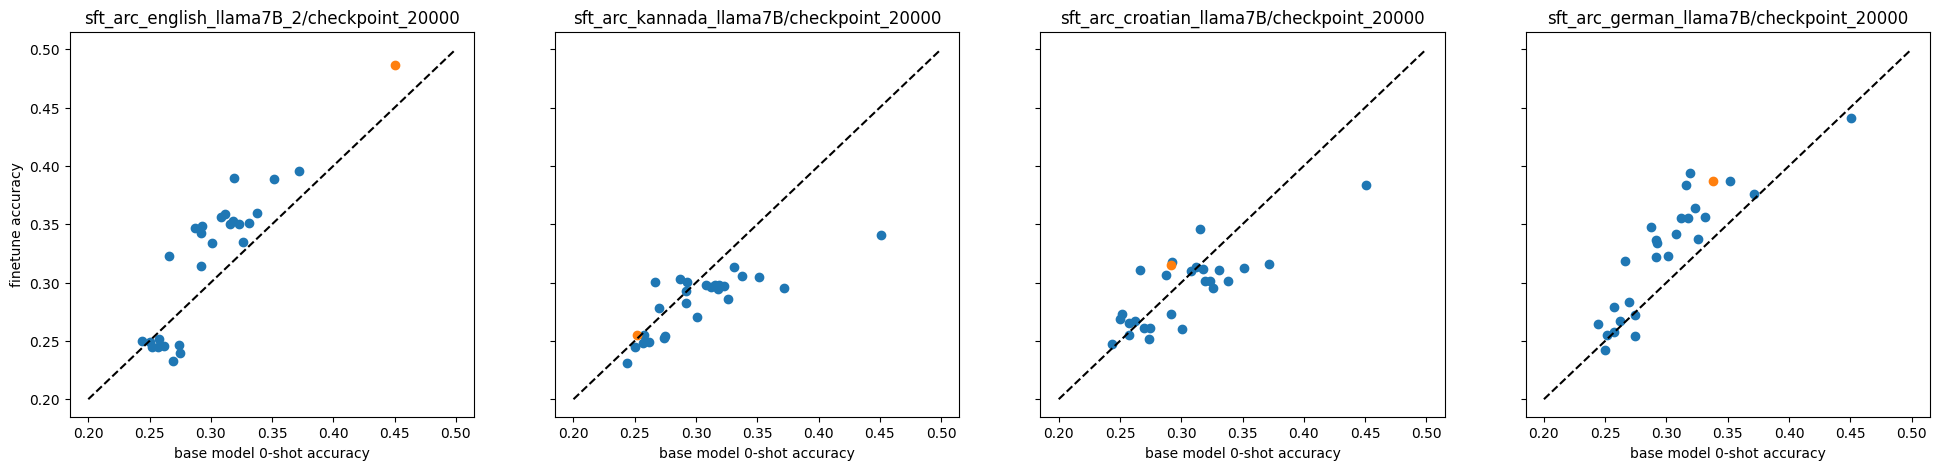

In [10]:
#make 3 subplots horizontal

fig, axs = plt.subplots(1, 4, figsize=(24, 5), sharex=True, sharey=True)

axs[0].scatter(accuracies_base[1:], accuracies_english[1:], label="test lanuguages")
axs[0].scatter(accuracies_base[:1], accuracies_english[:1], label="train lanuguages")

axs[0].set_title("sft_arc_english_llama7B_2/checkpoint_20000")
axs[0].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
axs[0].set_ylabel("finetune accuracy")
axs[0].set_xlabel("base model 0-shot accuracy")

# axs[1].scatter(accuracies_base[:len(train_language_types)], accuracies_multilingual[:len(train_language_types)], label="train lanuguages")
# axs[1].scatter(accuracies_base[-len(ood_language_types):], accuracies_multilingual[-len(ood_language_types):], label="test lanuguages")
# axs[1].set_title("sft_arc_multilingual_llama7B/checkpoint_20000")
# axs[1].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
# axs[1].set_xlabel("0-shot accuracy")


test_idxs = np.concatenate([np.arange(0,  13), np.arange(14,  len(accuracies_base))])
axs[1].scatter(accuracies_base[test_idxs], accuracies_kannada[test_idxs], label="test lanuguages")
axs[1].scatter(accuracies_base[13], accuracies_kannada[13], label="train lanuguages")

axs[1].set_title("sft_arc_kannada_llama7B/checkpoint_20000")
axs[1].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
axs[1].set_xlabel("base model 0-shot accuracy")


# axs[2].scatter(accuracies_base[:5], accuracies_multilingual_easy[:5], label="train lanuguages")
# axs[2].scatter(accuracies_base[5:], accuracies_multilingual_easy[5:], label="test lanuguages")
# axs[2].set_title("sft_arc_multilingual_easy_llama7B/checkpoint_20000")
# axs[2].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
# axs[2].set_xlabel("0-shot accuracy")

test_idxs = np.concatenate([np.arange(0,  9), np.arange(10,  len(accuracies_base))])
axs[2].scatter(accuracies_base[test_idxs], accuracies_croatian[test_idxs], label="test lanuguages")
axs[2].scatter(accuracies_base[9], accuracies_croatian[9], label="train lanuguages")
axs[2].set_title("sft_arc_croatian_llama7B/checkpoint_20000")
axs[2].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
axs[2].set_xlabel("base model 0-shot accuracy")


test_idxs = np.concatenate([[0], np.arange(2,  len(accuracies_base))])
axs[3].scatter(accuracies_base[test_idxs], accuracies_german[test_idxs], label="test lanuguages")
axs[3].scatter(accuracies_base[1:2], accuracies_german[1:2], label="train lanuguages")
axs[3].set_title("sft_arc_german_llama7B/checkpoint_20000")
axs[3].plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")
axs[3].set_xlabel("base model 0-shot accuracy")

plt.savefig("delete.jpg")


Text(0, 0.5, 'finetune accuracy')

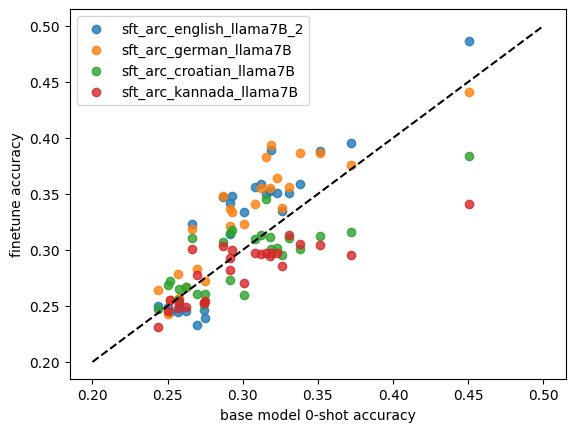

In [12]:
plt.scatter(accuracies_base, accuracies_english, label="sft_arc_english_llama7B_2", alpha=0.8)
plt.scatter(accuracies_base, accuracies_german, label="sft_arc_german_llama7B", alpha=0.8)
plt.scatter(accuracies_base, accuracies_croatian, label="sft_arc_croatian_llama7B", alpha=0.8)
plt.scatter(accuracies_base, accuracies_kannada, label="sft_arc_kannada_llama7B", alpha=0.8)
plt.plot([0.2, 0.5], [0.2, 0.5], color="black", linestyle="--")

plt.legend()

plt.xlabel("base model 0-shot accuracy")
plt.ylabel("finetune accuracy")



In [14]:
accuracies_base[9]

0.2917023096663815

Text(0.5, 0, '0-shot accuracy')

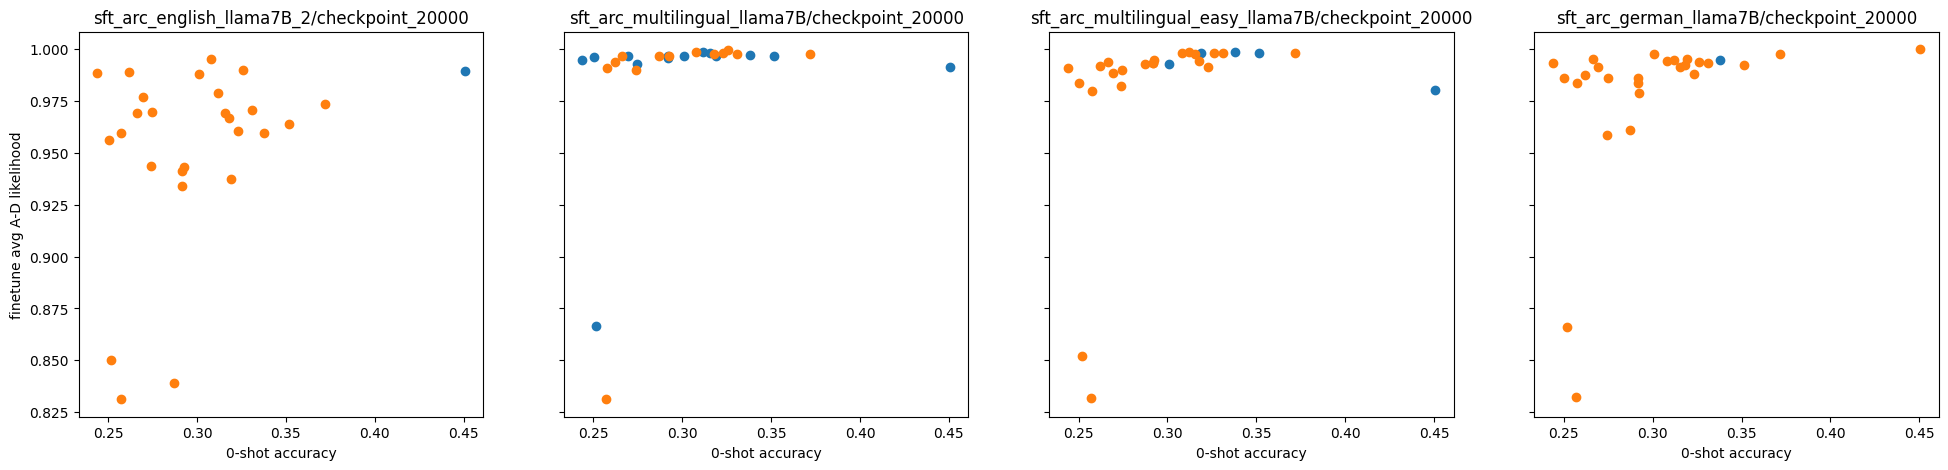

In [41]:

fig, axs = plt.subplots(1, 4, figsize=(24, 5), sharex=True, sharey=True)

axs[0].scatter(accuracies_base[:1], likelihoods_english[:1], label="train lanuguages")
axs[0].scatter(accuracies_base[1:], likelihoods_english[1:], label="test lanuguages")
axs[0].set_title("sft_arc_english_llama7B_2/checkpoint_20000")
axs[0].set_ylabel("finetune avg A-D likelihood")
axs[0].set_xlabel("0-shot accuracy")

axs[1].scatter(accuracies_base[:len(train_language_types)], likelihoods_multilingual[:len(train_language_types)], label="train lanuguages")
axs[1].scatter(accuracies_base[-len(ood_language_types):], likelihoods_multilingual[-len(ood_language_types):], label="test lanuguages")
axs[1].set_title("sft_arc_multilingual_llama7B/checkpoint_20000")
axs[1].set_xlabel("0-shot accuracy")



axs[2].scatter(accuracies_base[:5], likelihoods_multilingual_easy[:5], label="train lanuguages")
test_idxs = np.concatenate([[0], np.arange(2,  len(accuracies_base))])

axs[2].scatter(accuracies_base[5:], likelihoods_multilingual_easy[5:], label="test lanuguages")
axs[2].set_title("sft_arc_multilingual_easy_llama7B/checkpoint_20000")
axs[2].set_xlabel("0-shot accuracy")


axs[3].scatter(accuracies_base[1:2], likelihoods_german[1:2], label="train lanuguages")
test_idxs = np.concatenate([[0], np.arange(2,  len(accuracies_base))])
axs[3].scatter(accuracies_base[test_idxs], likelihoods_german[test_idxs], label="test lanuguages")
axs[3].set_title("sft_arc_german_llama7B/checkpoint_20000")
axs[3].set_xlabel("0-shot accuracy")

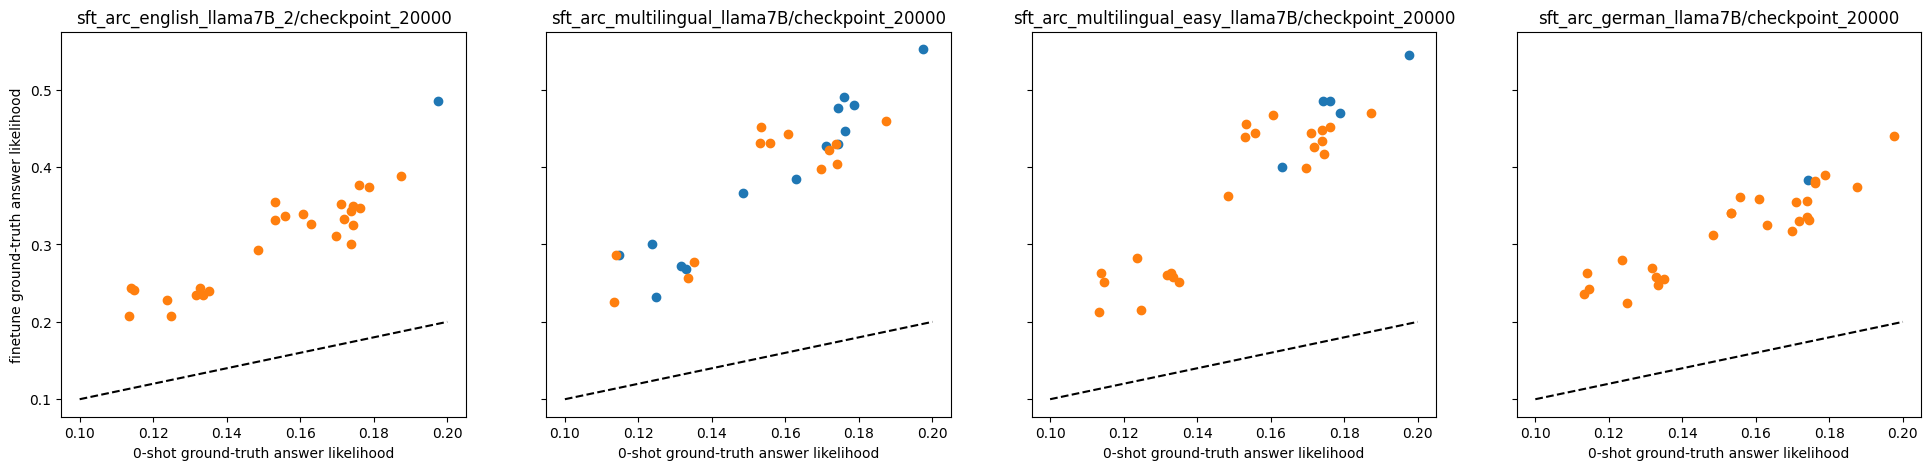

In [42]:

fig, axs = plt.subplots(1, 4, figsize=(24, 5), sharex=True, sharey=True)

axs[0].scatter(likelihoods_gt_base[:1], likelihoods_gt_english[:1], label="train lanuguages")
axs[0].scatter(likelihoods_gt_base[1:], likelihoods_gt_english[1:], label="test lanuguages")
axs[0].set_title("sft_arc_english_llama7B_2/checkpoint_20000")
axs[0].set_ylabel("finetune ground-truth answer likelihood")
axs[0].set_xlabel("0-shot ground-truth answer likelihood")
axs[0].plot([0.1, 0.2], [0.1, 0.2], color="black", linestyle="--")

axs[1].scatter(likelihoods_gt_base[:len(train_language_types)], likelihoods_gt_multilingual[:len(train_language_types)], label="train lanuguages")
axs[1].scatter(likelihoods_gt_base[-len(ood_language_types):], likelihoods_gt_multilingual[-len(ood_language_types):], label="test lanuguages")
axs[1].set_title("sft_arc_multilingual_llama7B/checkpoint_20000")
axs[1].set_xlabel("0-shot ground-truth answer likelihood")
axs[1].plot([0.1, 0.2], [0.1, 0.2], color="black", linestyle="--")



axs[2].scatter(likelihoods_gt_base[:5], likelihoods_gt_multilingual_easy[:5], label="train lanuguages")
axs[2].scatter(likelihoods_gt_base[5:], likelihoods_gt_multilingual_easy[5:], label="test lanuguages")
axs[2].set_title("sft_arc_multilingual_easy_llama7B/checkpoint_20000")
axs[2].set_xlabel("0-shot ground-truth answer likelihood")
axs[2].plot([0.1, 0.2], [0.1, 0.2], color="black", linestyle="--")


axs[3].scatter(likelihoods_gt_base[1:2], likelihoods_gt_german[1:2], label="train lanuguages")
test_idxs = np.concatenate([[0], np.arange(2,  len(accuracies_base))])
axs[3].scatter(likelihoods_gt_base[test_idxs], likelihoods_gt_german[test_idxs], label="test lanuguages")
axs[3].set_title("sft_arc_german_llama7B/checkpoint_20000")
axs[3].set_xlabel("0-shot ground-truth answer likelihood")
axs[3].plot([0.1, 0.2], [0.1, 0.2], color="black", linestyle="--")
